<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Japan_Top_50_Universities_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("/content/japan_universities_2026.csv")
df.head()

,University_Name,National_Rank,Founded_Year,Institution_Type,Region,Research_Impact_Score,Intl_Student_Ratio,Employment_Rate
0,University of Tokyo,1,1877,National,Tokyo,98.5,14.2,94.5
1,Kyoto University,2,1897,National,Kyoto,97.2,12.5,93.8
2,Tohoku University,3,1907,National,Miyagi,94.8,11.8,95.2
3,Institute of Science Tokyo,4,2024,National,Tokyo,95.1,12.8,97.5
4,Osaka University,5,1931,National,Osaka,92.1,10.9,94.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   University_Name        52 non-null     object 
 1   National_Rank          52 non-null     int64  
 2   Founded_Year           52 non-null     int64  
 3   Institution_Type       52 non-null     object 
 4   Region                 52 non-null     object 
 5   Research_Impact_Score  52 non-null     float64
 6   Intl_Student_Ratio     52 non-null     float64
 7   Employment_Rate        52 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.4+ KB


In [80]:
df.isna().sum()

,0
University_Name,0
National_Rank,0
Founded_Year,0
Institution_Type,0
Region,0
Research_Impact_Score,0
Intl_Student_Ratio,0
Employment_Rate,0


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
National_Rank,52.0,26.500000,15.154757,1.0,13.750,26.50,39.250,52.0
Founded_Year,52.0,1926.903846,39.833112,1858.0,1888.000,1940.50,1949.000,2024.0
Research_Impact_Score,52.0,69.357692,14.233313,48.8,57.325,67.15,79.825,98.5
Intl_Student_Ratio,52.0,10.276923,7.532924,3.9,5.425,8.15,12.175,48.5
Employment_Rate,52.0,92.223077,4.161618,84.2,88.775,93.30,95.250,98.2


In [82]:
numerical = ['Founded_Year','Research_Impact_Score','Intl_Student_Ratio',
             'Employment_Rate']


catagorical = ['University_Name','Institution_Type','Region']

target = "National_Rank"

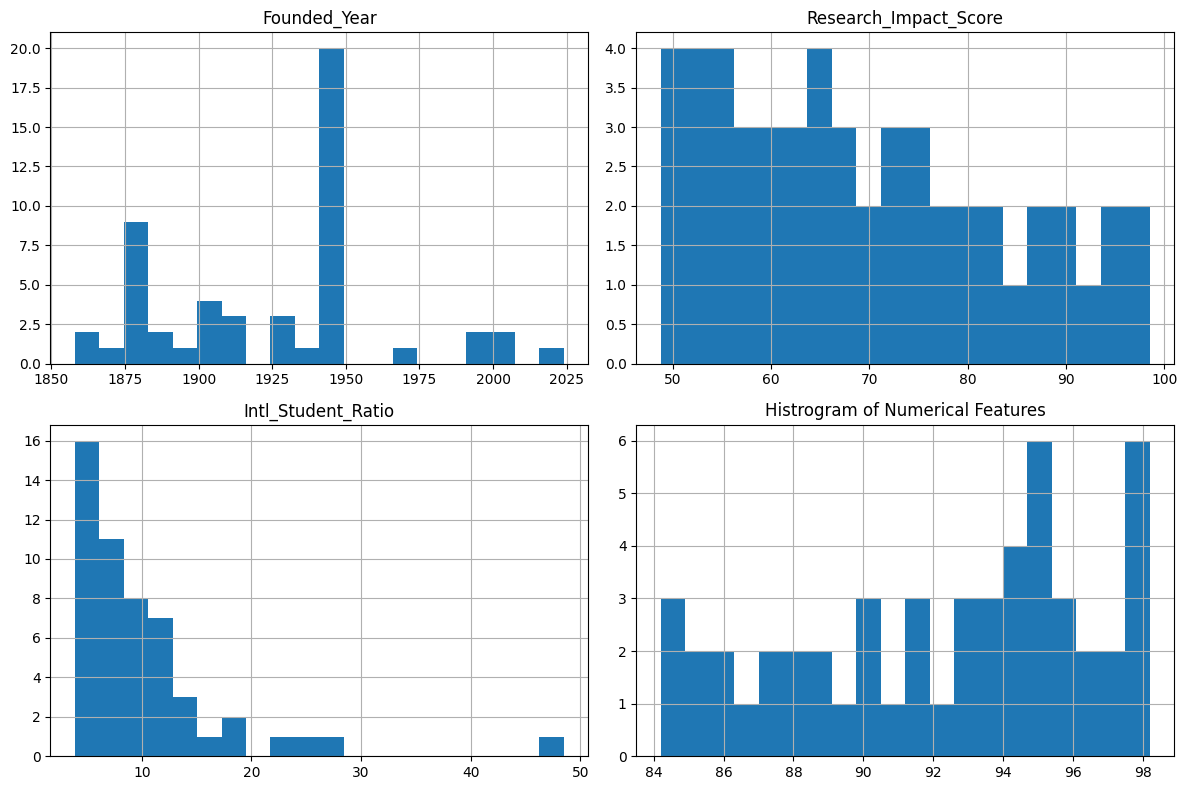

In [83]:
df[numerical].hist(bins=20,figsize=(12,8))
plt.title("Histrogram of Numerical Features")
plt.tight_layout()
plt.show()

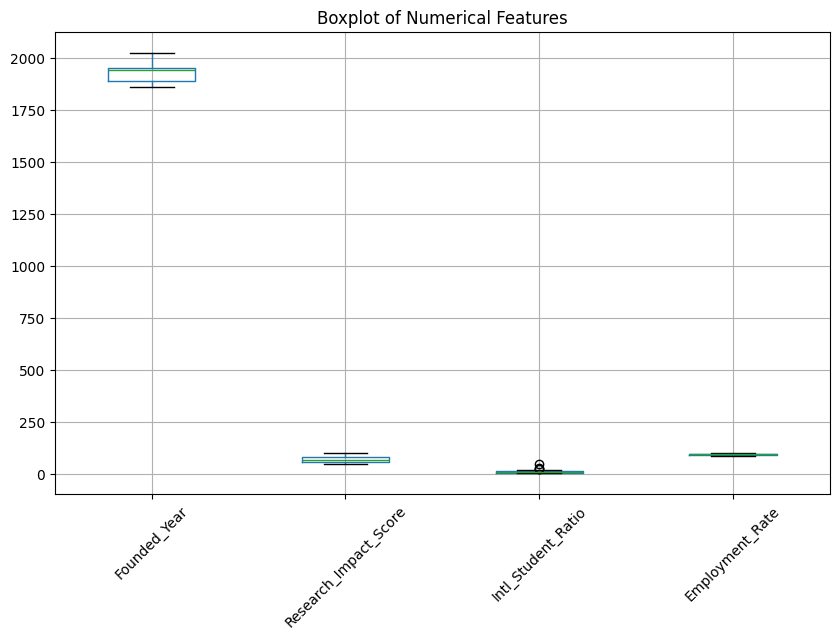

In [84]:
plt.figure(figsize=(10,6))
df[numerical].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

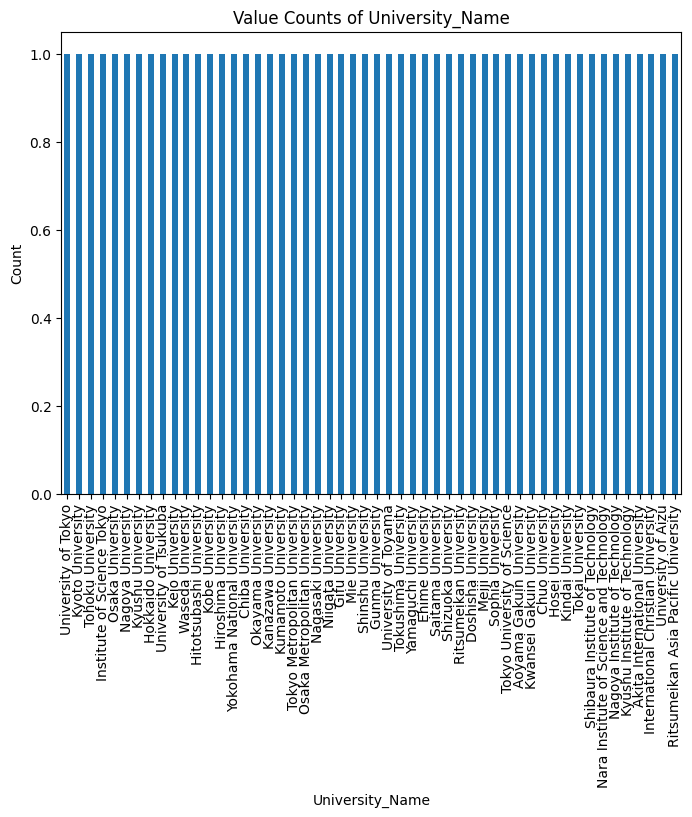

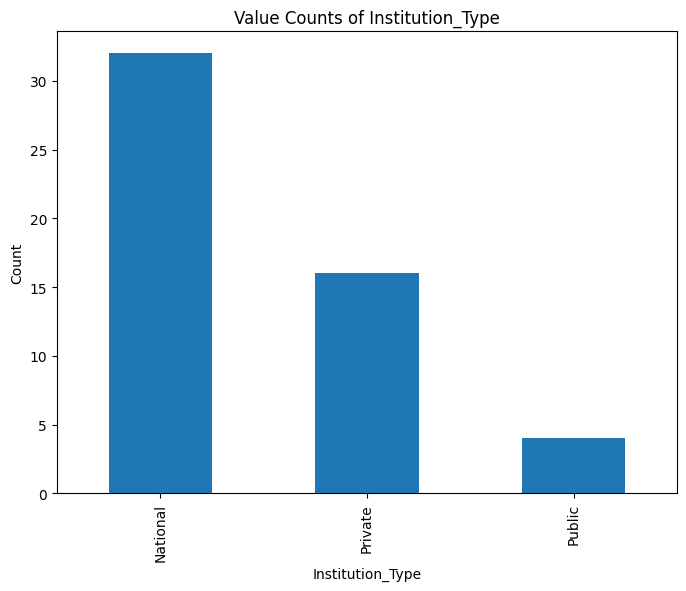

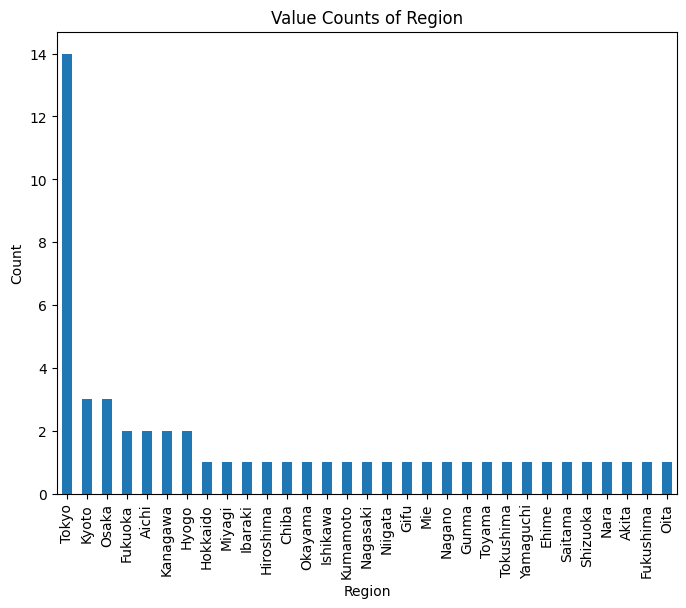

In [85]:
for c in catagorical :
  plt.figure(figsize=(8,6))
  df[c].value_counts().plot(kind='bar')
  plt.title(f"Value Counts of {c}")
  plt.xlabel(c)
  plt.ylabel("Count")
  plt.show()

In [86]:
df.nunique()

,0
University_Name,52
National_Rank,52
Founded_Year,31
Institution_Type,3
Region,31
Research_Impact_Score,52
Intl_Student_Ratio,43
Employment_Rate,47


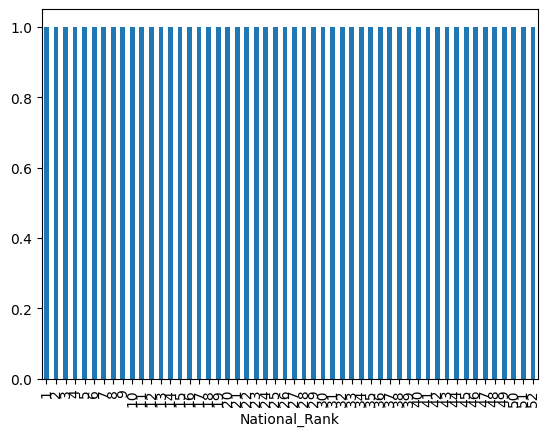

In [87]:
df[target].value_counts().plot(kind='bar')
plt.show()

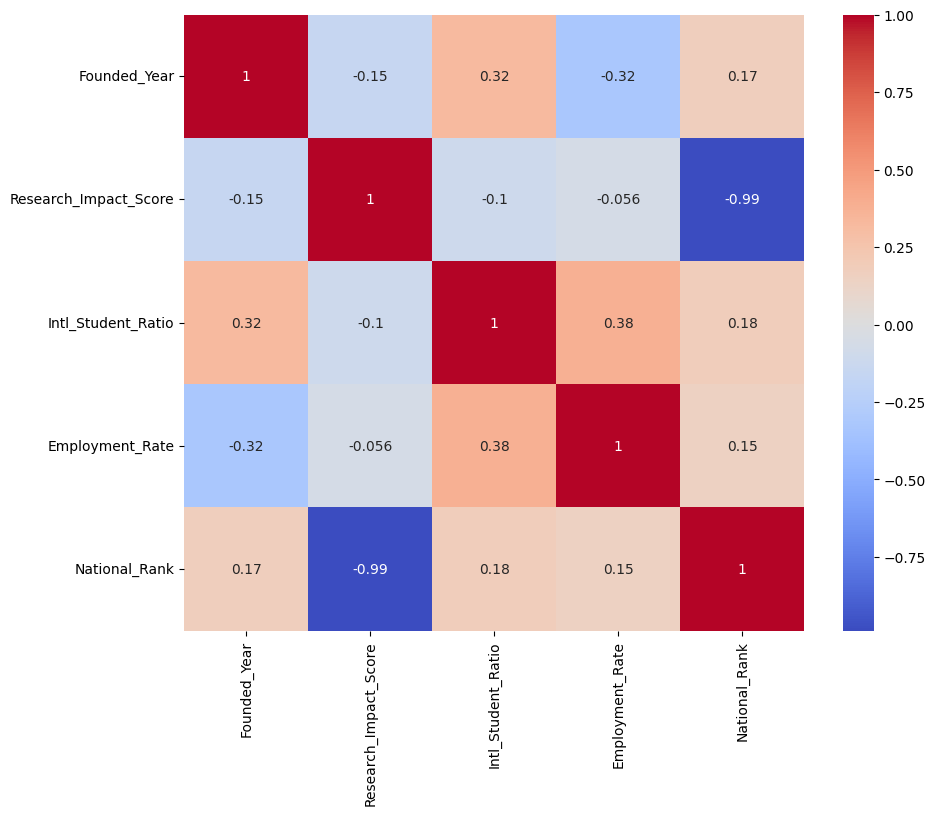

In [88]:
corr_matric = df[numerical +[target]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matric,annot=True,cmap='coolwarm')
plt.show()

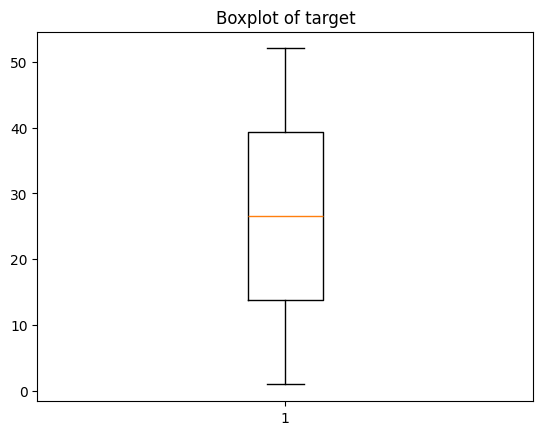

In [89]:
plt.boxplot(df[target])
plt.title("Boxplot of target")
plt.show()

In [90]:
df.columns

Index(['University_Name', 'National_Rank', 'Founded_Year', 'Institution_Type',
       'Region', 'Research_Impact_Score', 'Intl_Student_Ratio',
       'Employment_Rate'],
      dtype='object')

In [91]:
X = df.drop("National_Rank",axis=1)
y = df["National_Rank"]

In [92]:
numerical_cols = X.select_dtypes(include=np.number).columns

print("Numerical Columns =",numerical_cols)

catagorical_cols = X.select_dtypes(exclude=np.number).columns

print("Catagorical Columns =",catagorical_cols)


Numerical Columns = Index(['Founded_Year', 'Research_Impact_Score', 'Intl_Student_Ratio',
       'Employment_Rate'],
      dtype='object')
Catagorical Columns = Index(['University_Name', 'Institution_Type', 'Region'], dtype='object')


In [93]:
from logging import log
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
numerical_pipe = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("log", FunctionTransformer(np.log1p)),
        ("scaler",RobustScaler())
    ]
)

In [94]:
from sklearn.preprocessing import OneHotEncoder
catagorical_pipe = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [95]:
from sklearn.compose import ColumnTransformer
combine_pipe = ColumnTransformer(
    transformers=[
        ("num",numerical_pipe,numerical_cols),
        ("cat",catagorical_pipe,catagorical_cols)
    ]
)

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
sv = SVR()
knn = KNeighborsRegressor()

In [98]:

#voting regressor

voting_rg = VotingRegressor(
    estimators=[
        ("lr",lr),
        ("dt",dt),
        ("rf",rf),
        ("gb",gb),
    ]
)

In [103]:
# Stacking regressor
stacking_rg = StackingRegressor(
    estimators=[
        ("lr",lr),
        ("rf",rf),
        ("gb",gb)

]
)

In [104]:
model_to_train = [
    voting_rg,
    stacking_rg,
    lr,
    dt,
    rf,
    gb,
    sv,
    knn
]

In [105]:
#training & Evaluation

result = []

# Create a list of (name, model) tuples for iteration
# This addresses the AttributeError by providing name-model pairs directly
models_with_names = [
    ("VotingRegressor", voting_rg),
    ("StackingRegressor", stacking_rg),
    ("LinearRegression", lr),
    ("DecisionTreeRegressor", dt),
    ("RandomForestRegressor", rf),
    ("GradientBoostingRegressor", gb),
    ("SVR", sv),
    ("KNeighborsRegressor", knn)
]

for name , model in models_with_names:
  #create full pipeline with preprocessor
  pipe = Pipeline(
      [
          ('preprocessor', combine_pipe),
          ('model',model)
      ]
  )

  #train

  pipe.fit(X_train,y_train)

  #predict

  y_pred = pipe.predict(X_test)

  #Evaluate

  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)

  result.append({
      "Model": name,
      "R2 Score" :r2,
      "RMSE": rmse,
      "MAE" : mae
  })

results_df = pd.DataFrame(result).sort_values("R2 Score", ascending=False)

print(results_df)

                       Model  R2 Score       RMSE        MAE
1          StackingRegressor  0.997054   0.900984   0.782882
5  GradientBoostingRegressor  0.996223   1.020082   0.980070
4      RandomForestRegressor  0.993310   1.357588   1.126364
0            VotingRegressor  0.991502   1.530152   1.298547
3      DecisionTreeRegressor  0.988781   1.758098   1.636364
2           LinearRegression  0.971414   2.806338   2.486820
7        KNeighborsRegressor  0.948551   3.764910   3.309091
6                        SVR  0.258121  14.296528  13.205942


In [106]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a pipeline specifically for the StackingRegressor
stacking_pipeline = Pipeline(
    [
        ('preprocessor', combine_pipe),
        ('model', stacking_rg)
    ]
)

# Train the stacking pipeline
stacking_pipeline.fit(X_train, y_train)

# Make predictions on training and test sets
train_pred = stacking_pipeline.predict(X_train)
val_pred   = stacking_pipeline.predict(X_test) # Corrected: using X_test instead of X_val

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse   = np.sqrt(mean_squared_error(y_test, val_pred))   # Corrected: using y_test instead of y_val

print("Train RMSE:", train_rmse)
print("Test RMSE:", val_rmse) # Changed label to Test RMSE

Train RMSE: 0.9785741218734461
Test RMSE: 0.9338727479009747


In [107]:
# Create a pipeline specifically for the StackingRegressor
rf_pipeline = Pipeline(
    [
        ('preprocessor', combine_pipe),
        ('model', rf)
    ]
)

# Train the stacking pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions on training and test sets
train_pred = rf_pipeline.predict(X_train)
val_pred   = rf_pipeline.predict(X_test) # Corrected: using X_test instead of X_val

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse   = np.sqrt(mean_squared_error(y_test, val_pred))   # Corrected: using y_test instead of y_val

print("Train RMSE:", train_rmse)
print("Test RMSE:", val_rmse) # Changed label to Test RMSE

Train RMSE: 0.6184086580026859
Test RMSE: 1.6043010372688224


In [108]:
# Create a pipeline specifically for the StackingRegressor
vt_pipeline = Pipeline(
    [
        ('preprocessor', combine_pipe),
        ('model', voting_rg)
    ]
)

# Train the stacking pipeline
vt_pipeline.fit(X_train, y_train)

# Make predictions on training and test sets
train_pred = vt_pipeline.predict(X_train)
val_pred   = vt_pipeline.predict(X_test) # Corrected: using X_test instead of X_val

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse   = np.sqrt(mean_squared_error(y_test, val_pred))   # Corrected: using y_test instead of y_val

print("Train RMSE:", train_rmse)
print("Test RMSE:", val_rmse) # Changed label to Test RMSE

Train RMSE: 0.15823900714718922
Test RMSE: 1.500850131224452


In [109]:
# Create a pipeline specifically for the StackingRegressor
dt_pipeline = Pipeline(
    [
        ('preprocessor', combine_pipe),
        ('model', dt)
    ]
)

# Train the stacking pipeline
dt_pipeline.fit(X_train, y_train)

# Make predictions on training and test sets
train_pred = dt_pipeline.predict(X_train)
val_pred   = dt_pipeline.predict(X_test) # Corrected: using X_test instead of X_val

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse   = np.sqrt(mean_squared_error(y_test, val_pred))   # Corrected: using y_test instead of y_val

print("Train RMSE:", train_rmse)
print("Test RMSE:", val_rmse) # Changed label to Test RMSE

Train RMSE: 0.0
Test RMSE: 2.9848100289785457


In [110]:
# Create a pipeline specifically for the StackingRegressor
lr_pipeline = Pipeline(
    [
        ('preprocessor', combine_pipe),
        ('model', lr)
    ]
)

# Train the stacking pipeline
lr_pipeline.fit(X_train, y_train)

# Make predictions on training and test sets
train_pred = lr_pipeline.predict(X_train)
val_pred   = lr_pipeline.predict(X_test) # Corrected: using X_test instead of X_val

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse   = np.sqrt(mean_squared_error(y_test, val_pred))   # Corrected: using y_test instead of y_val

print("Train RMSE:", train_rmse)
print("Test RMSE:", val_rmse) # Changed label to Test RMSE

Train RMSE: 1.7836679409269384e-05
Test RMSE: 2.8063380960943567


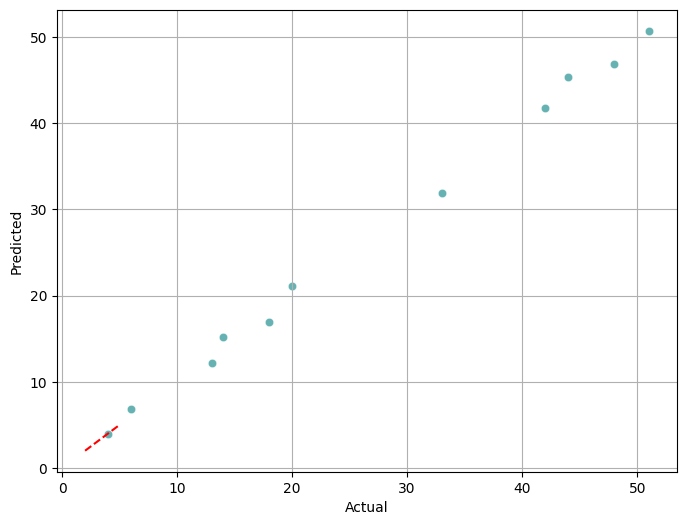

In [114]:
best_model_name = results_df.iloc[0]['Model']
best_model_obj = None
for name, model in models_with_names:
    if name == best_model_name:
        best_model_obj = model
        break


#fit the best model

final_pipe = Pipeline([
    ('preprocessor', combine_pipe),
    ('model',best_model_obj)
])

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)



#plot Actual vs predicted

plt.figure( figsize = (8,6) )

sns.scatterplot(x=y_test, y=y_final_pred, alpha = 0.6, color='teal' )
plt.plot( [2,5] , [2,5], color = "red", linestyle = '--'  )
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.grid(True)
plt.show()

In [116]:
import pandas as pd
import numpy as np

# 1️⃣ Train the stacking pipeline
stacking_pipeline.fit(X_train, y_train)

# 2️⃣ Make predictions on test set
y_pred_test = stacking_pipeline.predict(X_test)

# 3️⃣ Optional: If you used log-transform on target
# y_pred_test = np.expm1(y_pred_test)  # Uncomment if y_train was log-transformed

# 4️⃣ Round predictions if target is integer
y_pred_test = np.round(y_pred_test).astype(int)

# 5️⃣ Prepare submission DataFrame
submission_df = pd.DataFrame({
    "id": X_test.index,  # Using X_test index as 'id'
    "National_Rank": y_pred_test     # Using 'National_Rank' as the target column name
})

# 6️⃣ Save to CSV
submission_df.to_csv("stacking_submission.csv", index=False)

print("✅ Submission CSV created: stacking_submission.csv")

✅ Submission CSV created: stacking_submission.csv
